In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from Reward_Training.rt_extension import Reward_Training
from rc_extension import Reward_Competition
from pathlib import Path


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts"

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\Test"

csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\manual_scoring_combined.xlsx"

directory_path = None
directory_path1 = None
directory_path2 = None
directory_path3 = None
directory_path4 = None
directory_path5 = None
directory_path6 = None
directory_path7 = None
directory_path8 = None
directory_path9 = None
directory_path10 = None
directory_path11 = None 

In [3]:
exp = Reward_Competition(experiment_folder_path=experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240912-062009\Notes.txt
read from t=0s to t=2073.36s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240913-062437\Notes.txt
read from t=0s to t=2044.96s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240914-065650\Notes.txt
read from t=0s to t=2047.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240914-095611\Notes.txt
read from t=0s to t=2053.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n7-240912-095235\Notes.txt
read from t=0s to t=1955.86s
Found Synapse note file: C:\Users\alber\

In [4]:
exp.rtc_processing()

Processing trial n6-240912-062009...
Processing trial n6-240913-062437...
Processing trial n6-240914-065650...
Processing trial n6-240914-095611...
Processing trial n7-240912-095235...
Processing trial n7-240913-080108...
Processing trial n7-240914-082547...
Processing trial n7-240915-073140...
Processing trial nn1_nn3-250203-085508...
Processing trial nn1_pp1-250205-090150...
Processing trial nn2_nn1-250204-085225...
Processing trial nn2_nn4-250205-113735...
Processing trial nn2_pp2-250206-053033...
Processing trial nn3_pp3-250204-122327...
Processing trial nn4_nn3-250206-081929...
Processing trial nn4_pp4-250203-121223...
Processing trial nn5_nn8-250205-104235...
Processing trial nn5_pp5-250203-080636...
Processing trial nn6_nn7-250203-112333...
Processing trial nn6_nn7-250206-073116...
Processing trial nn7_pp7-250205-131504...
Processing trial nn8_nn5-250204-113128...
Processing trial nn8_pp8-250206-102501...
Processing trial p1-240611-082555...
Processing trial p1-240612-104753...


## Merging Competition Data with CSV

In [5]:
exp.read_manual_scoring(csv_path)
exp.merge_data()

Total rows: 96
Rows with missing trials: 23


In [6]:
exp.keep_first_tone()
"""exp.keep_last_tone()"""
exp.remove_tangles()
exp.remove_specified_subjects()

df_winning = exp.winning()
df_losing = exp.losing()

            file name subject  \
0   nn5-250203-080636     nn5   
1   pp5-250203-080636     pp5   
2   nn1-250203-085508     nn1   
3   nn3-250203-085508     nn3   
4   nn6-250203-112333     nn6   
..                ...     ...   
68   p5-240913-085922      p5   
69   p6-240913-054041      p6   
70   p8-240913-070924      p8   
71  nn2-250205-113735     nn2   
72  nn4-250205-113735     nn4   

                                               trial  \
0   <trial_class.Trial object at 0x0000020620494D10>   
1   <trial_class.Trial object at 0x000002061FCEE3C0>   
2   <trial_class.Trial object at 0x000002062028F1A0>   
3   <trial_class.Trial object at 0x000002062045B950>   
4   <trial_class.Trial object at 0x0000020620495820>   
..                                               ...   
68  <trial_class.Trial object at 0x000002061E19F6B0>   
69  <trial_class.Trial object at 0x000002062028EED0>   
70  <trial_class.Trial object at 0x00000206203D7530>   
71  <trial_class.Trial object at 0x00000206

In [7]:
df_winning[['subject','sound cues onset','port entries onset', 'port entries offset']]

,subject,sound cues onset,port entries onset,port entries offset
0,nn5,"[241.12775168, 321.12836608, 411.12895488, 491...","[184.1774592, 185.80733952, 193.31743744, 285....","[184.47745024, 187.45769984, 193.45752064, 285..."
1,pp5,"[241.12775168, 321.12836608, 411.12895488, 491...","[181.1275776, 184.02738176, 185.90744576, 187....","[181.68741888, 185.52766464, 186.98747904, 187..."
2,nn1,"[250.00820736, 330.00865792, 420.00941056, 500...","[194.11779584, 203.48796928, 215.75778304, 217...","[196.25771008, 206.667776, 217.06801152, 217.8..."
3,nn3,"[250.00820736, 330.00865792, 420.00941056, 500...","[219.1179776, 230.92805632, 231.34830592, 244....","[225.37814016, 231.26818816, 232.78813184, 246..."
4,nn6,"[240.79777792, 320.79822848, 410.79881728, 490...","[180.79727616, 184.92735488, 189.60744448, 189...","[184.34736128, 187.74720512, 189.75768576, 190..."
...,...,...,...,...
67,n7,"[241.4051328, 321.4057472, 411.40617216, 491.4...","[181.40479488, 191.73490688, 198.20494848, 208...","[181.57469696, 197.75488, 207.23499008, 208.64..."
68,p5,"[241.1798528, 321.1804672, 411.18089216, 491.1...","[186.78956032, 187.20964608, 189.38970112, 193...","[187.18949376, 187.71951616, 191.85958912, 194..."
69,p6,"[239.96678144, 319.967232, 409.9678208, 489.96...","[185.55650048, 189.13640448, 192.60653568, 197...","[187.58647808, 189.73638656, 193.11640576, 197..."
71,nn2,"[241.35155712, 321.35217152, 411.35243264, 491...","[215.92113152, 220.63136768, 235.13137152, 237...","[219.18121984, 222.68116992, 235.6412416, 241...."


In [8]:
port_entries_onset = df_winning[df_winning['subject'] == 'nn5']['port entries onset'].iloc[0]

indices = np.where(np.array(port_entries_onset) > 1111)[0]
print(indices)

values = np.array(port_entries_onset)
print(values[values > 1100])

[109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
[1110.67365376 1126.80370176 1128.58365952 1128.67360768 1128.7535616
 1153.80404224 1157.74373888 1157.89381632 1162.94385664 1163.27366656
 1165.69407488 1171.1438848  1172.87419904 1184.23404544 1184.58400768
 1194.4640512  1203.3941504  1210.24413696 1212.34440192 1222.91421184
 1289.67507968 1299.82480384 1308.23471104 1316.0349696  1327.51507456
 1328.5851136  1340.33506304 1372.62514176 1373.42517248 1389.58569472
 1390.49549824 1403.72557824 1417.58578688 1446.30595584 1447.18577664
 1455.85569792 1456.90574848 1483.71603456 1502.97608192 1503.8660608

In [9]:
df_winning[['subject', 'filtered_sound_cues']]


,subject,filtered_sound_cues
0,nn5,"[1121.13352704, 1421.13570816, 1691.13731072, ..."
1,pp5,"[241.12775168, 321.12836608, 411.12895488, 491..."
2,nn1,"[330.00865792, 420.00941056, 500.00986112, 503..."
3,nn3,"[250.00820736, 420.00941056, 860.01221632, 122..."
4,nn6,"[320.79822848, 490.79926784, 565.79981312, 665..."
...,...,...
67,n7,"[321.4057472, 411.40617216, 491.40662272, 566...."
68,p5,"[241.1798528, 411.18089216, 491.18134272, 931...."
69,p6,[1889.97648384]
71,nn2,"[241.35155712, 321.35217152, 411.35243264, 491..."


In [10]:
x_df = exp.find_first_lick_after_sound_cue(df_winning)

In [11]:
x_df[['subject', 'first_lick_after_sound_cue']]

,subject,first_lick_after_sound_cue
0,nn5,"[1125.13352704, 1425.13570816, 1695.13731072, ..."
1,pp5,"[245.12775168, 325.12836608, 415.12895488, 495..."
2,nn1,"[334.00865792, 424.00941056, 504.00986112, 507..."
3,nn3,"[254.00820736, 424.00941056, 864.01221632, 122..."
4,nn6,"[324.79822848, 494.79926784, 569.79981312, 669..."
...,...,...
67,n7,"[325.4057472, 415.40617216, 495.40662272, 570...."
68,p5,"[246.93997568, 415.18089216, 498.04148736, 935..."
69,p6,[1893.97648384]
71,nn2,"[245.35155712, 325.35217152, 415.35243264, 498..."


In [12]:
print(df_winning)
print(df_losing)
# compute first lick after tone
exp.find_first_lick_after_sound_cue(df_losing)
exp.find_first_lick_after_sound_cue(df_winning)
# compute offset to first lick after sound cue
exp.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_winning)
exp.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_losing)

            file name subject  \
0   nn5-250203-080636     nn5   
1   pp5-250203-080636     pp5   
2   nn1-250203-085508     nn1   
3   nn3-250203-085508     nn3   
4   nn6-250203-112333     nn6   
..                ...     ...   
67   n7-240913-080108      n7   
68   p5-240913-085922      p5   
69   p6-240913-054041      p6   
71  nn2-250205-113735     nn2   
72  nn4-250205-113735     nn4   

                                               trial  \
0   <trial_class.Trial object at 0x0000020620494D10>   
1   <trial_class.Trial object at 0x000002061FCEE3C0>   
2   <trial_class.Trial object at 0x000002062028F1A0>   
3   <trial_class.Trial object at 0x000002062045B950>   
4   <trial_class.Trial object at 0x0000020620495820>   
..                                               ...   
67  <trial_class.Trial object at 0x000002061FC3C7A0>   
68  <trial_class.Trial object at 0x000002061E19F6B0>   
69  <trial_class.Trial object at 0x000002062028EED0>   
71  <trial_class.Trial object at 0x00000206

In [13]:
ranks = exp.find_ranks_using_ds(csv_path)
df_winning = exp.merging_ranks(ranks, df=df_winning)
df_losing = exp.merging_ranks(ranks, df=df_losing)

## Computing all DA metrics

In [14]:
exp.compute_event_induced_DA(df_winning)
exp.compute_event_induced_DA(df_losing)

exp.find_mean_event_zscore(df_winning, behavior='Tone')
exp.find_mean_event_zscore(df_losing, behavior='Tone')
exp.find_mean_event_zscore(df_winning, behavior='Lick')
exp.find_mean_event_zscore(df_losing, behavior='Lick')
# computing standard DA
exp.compute_tone_da_metrics(df_winning)
exp.compute_lick_da_metrics(df_winning)
exp.compute_tone_da_metrics(df_losing)
exp.compute_lick_da_metrics(df_losing)

exp.compute_tone_da_metrics(df_winning, mode='EI')
exp.compute_tone_da_metrics(df_losing, mode='EI')
print(df_winning.columns)
# Computing Event Induced DA
exp.compute_lick_da_metrics(df_winning, mode='EI')
exp.compute_lick_da_metrics(df_losing, mode='EI')
print(df_winning)

# Creating column for first and last bouts for winning and losing.
exp.first_last(df_winning)
exp.first_last(df_losing)

AUC (0-4s): 6.776188389622729
AUC (0-4s): -0.14044191359559058
AUC (0-4s): 1.7746819545694021
AUC (0-4s): 2.9209738935585174
AUC (0-4s): 4.3723736017019466
AUC (0-4s): 6.119572151757707
AUC (0-4s): 2.468899124423295
AUC (0-4s): 0.2597160503324171
AUC (0-4s): 3.0103617454717786
AUC (0-4s): 1.7120737567801687
AUC (0-4s): -0.1286811856517786
AUC (0-4s): -1.0726499034631911
AUC (0-4s): 2.4102744840199586
AUC (0-4s): 3.1167431262989473
AUC (0-4s): 0.25486203989355627
AUC (0-4s): 0.42270749778369643
AUC (0-4s): 3.2361796042759448
AUC (0-4s): 0.6557910582881478
AUC (0-4s): 0.9814935176922878
AUC (0-4s): 3.343767868978353
AUC (0-4s): -0.28025683152070097
AUC (0-4s): -0.39841692579116106
AUC (0-4s): 1.436098440374851
AUC (0-4s): 0.8901204534799652
AUC (0-4s): 4.816801428400358
AUC (0-4s): 3.732218314442291
AUC (0-4s): 6.030698685482298
AUC (0-4s): -0.3048245825943891
AUC (0-4s): 2.2580800389994105
AUC (0-4s): 2.9250610628708476
AUC (0-4s): 0.027054399494025314
AUC (0-4s): 0.4573631983605062
AUC

In [15]:
print(df_winning.columns.tolist())


['file name', 'subject', 'trial', 'sound cues', 'port entries', 'sound cues onset', 'port entries onset', 'port entries offset', 'subject_name', 'winner_array', 'first_value', 'first_tone', 'first_bout', 'filtered_winner_array', 'filtered_sound_cues', 'filtered_port_entries', 'filtered_port_entry_offset', 'first_lick_after_sound_cue', 'closest_lick_offset', 'DS', 'Cage', 'Rank', 'Tone Event_Time_Axis', 'Tone Event_Zscore', 'Lick Event_Time_Axis', 'Lick Event_Zscore', 'Mean Tone Event_Zscore', 'Mean Lick Event_Zscore', 'Tone AUC', 'Tone Max Peak', 'Tone Time of Max Peak', 'Tone Mean Z-score', 'Tone Adjusted End', 'Lick AUC', 'Lick Max Peak', 'Lick Time of Max Peak', 'Lick Mean Z-score', 'Lick Adjusted End', 'Tone Mean Z-score EI', 'Tone AUC EI', 'Tone Max Peak EI', 'Tone Time of Max Peak EI', 'Lick Mean Z-score EI', 'Lick AUC EI', 'Lick Max Peak EI', 'Lick Time of Max Peak EI', 'Lick AUC First', 'Lick AUC Last', 'Lick Max Peak First', 'Lick Max Peak Last', 'Lick Mean Z-score First', 'Li

In [16]:
df_winning[['subject','Tone Time of Max Peak EI']]

,subject,Tone Time of Max Peak EI
0,nn5,0.744151
1,pp5,0.366664
2,nn1,0.672389
3,nn3,0.674355
4,nn6,0.463002
...,...,...
64,n7,3.316767
65,p5,0.460052
66,p6,1.549261
67,nn2,0.411883


In [17]:
print(df_winning['Lick Time of Max Peak EI'])

0     3.013018
1     1.414595
2     0.826737
3     3.003187
4     0.000000
        ...   
64    3.946906
65    0.648806
66    0.052101
67    1.363476
68    3.523215
Name: Lick Time of Max Peak EI, Length: 69, dtype: float64


In [18]:
print(df_winning)

            file name subject  \
0   nn5-250203-080636     nn5   
1   pp5-250203-080636     pp5   
2   nn1-250203-085508     nn1   
3   nn3-250203-085508     nn3   
4   nn6-250203-112333     nn6   
..                ...     ...   
64   n7-240913-080108      n7   
65   p5-240913-085922      p5   
66   p6-240913-054041      p6   
67  nn2-250205-113735     nn2   
68  nn4-250205-113735     nn4   

                                               trial  \
0   <trial_class.Trial object at 0x0000020620494D10>   
1   <trial_class.Trial object at 0x000002061FCEE3C0>   
2   <trial_class.Trial object at 0x000002062028F1A0>   
3   <trial_class.Trial object at 0x000002062045B950>   
4   <trial_class.Trial object at 0x0000020620495820>   
..                                               ...   
64  <trial_class.Trial object at 0x000002061FC3C7A0>   
65  <trial_class.Trial object at 0x000002061E19F6B0>   
66  <trial_class.Trial object at 0x000002062028EED0>   
67  <trial_class.Trial object at 0x00000206

## PSTH Graphs

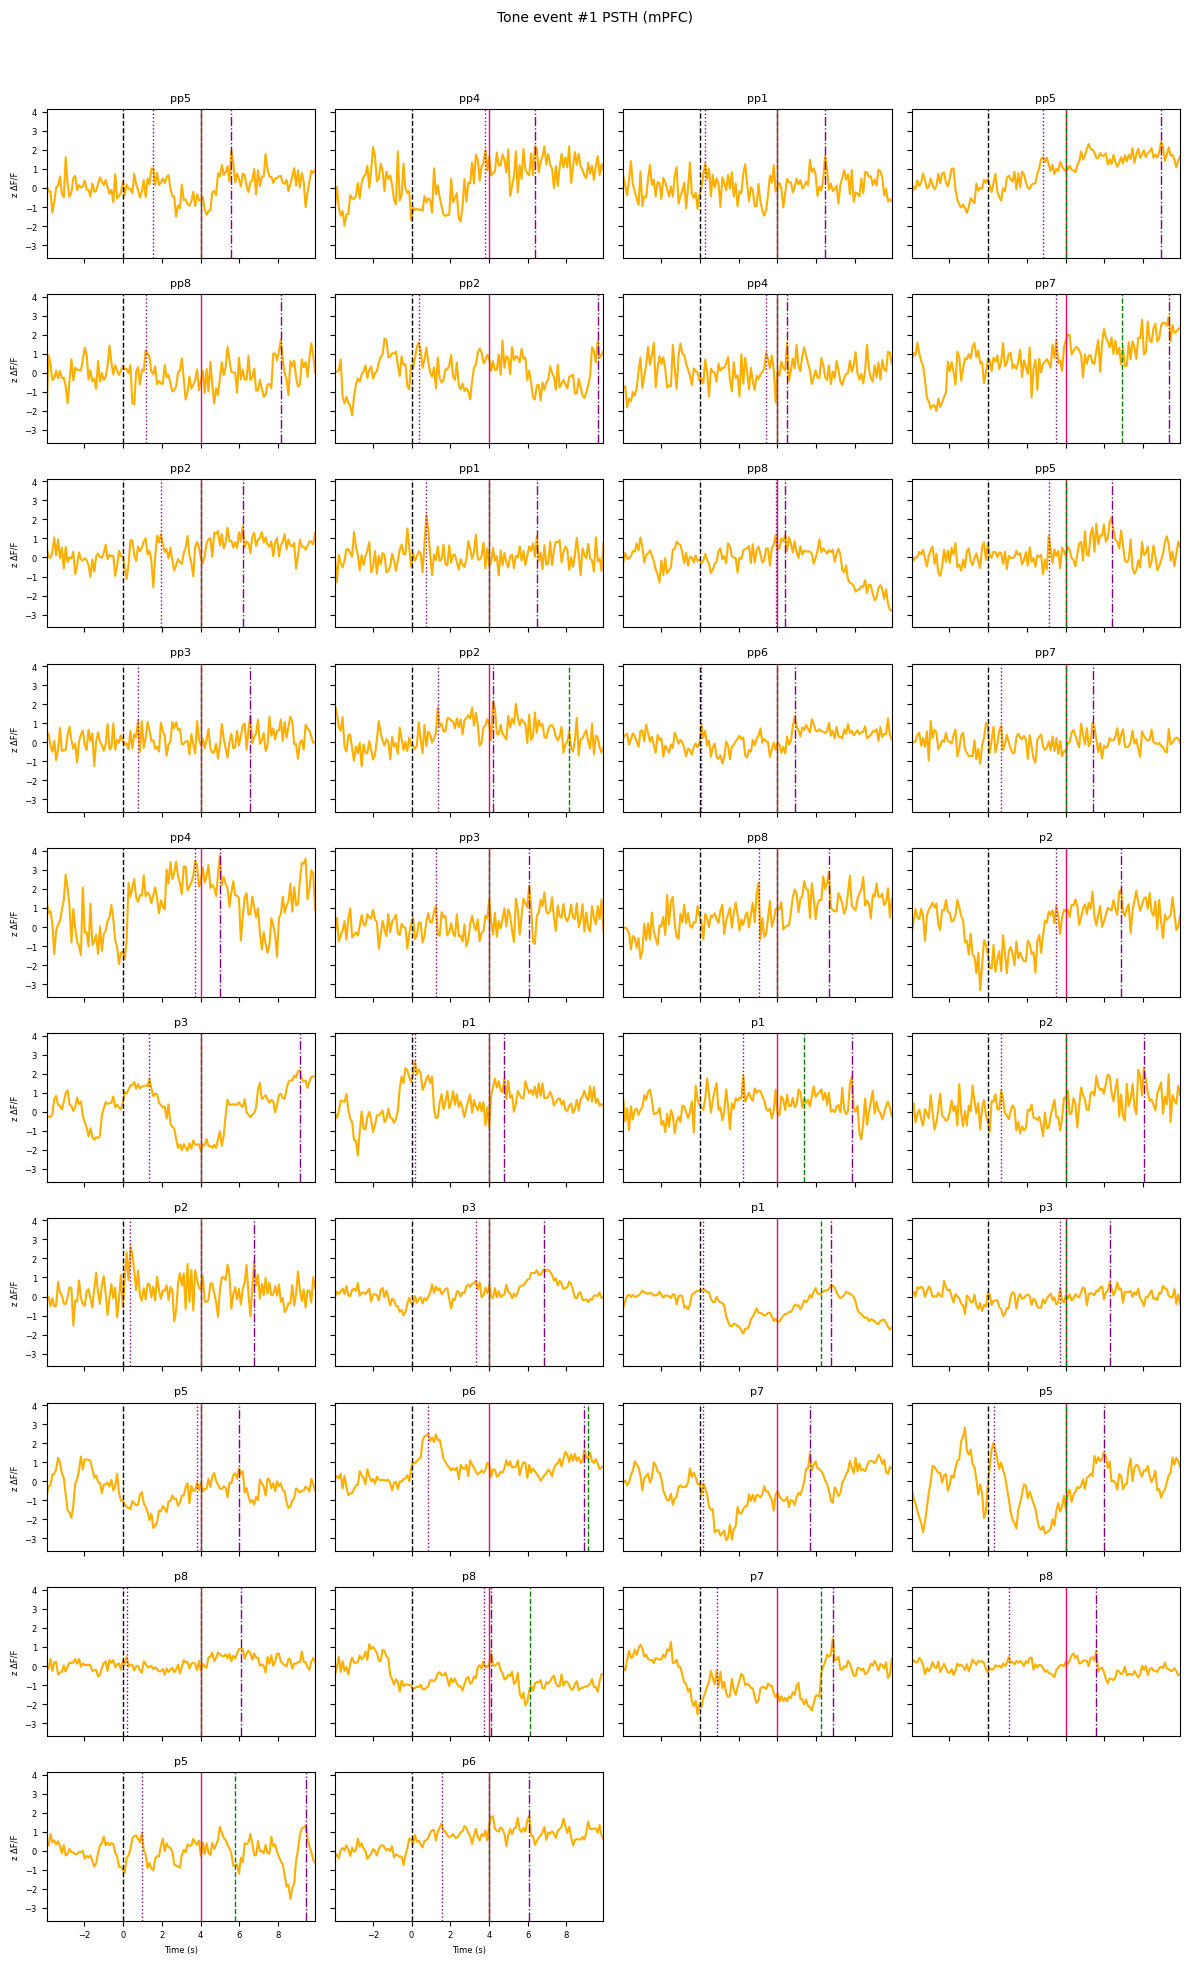

In [19]:
peak_df = exp.plot_tone_and_lick_peaks_with_first_lick(df_winning, event_index=1, brain_region='mPFC')


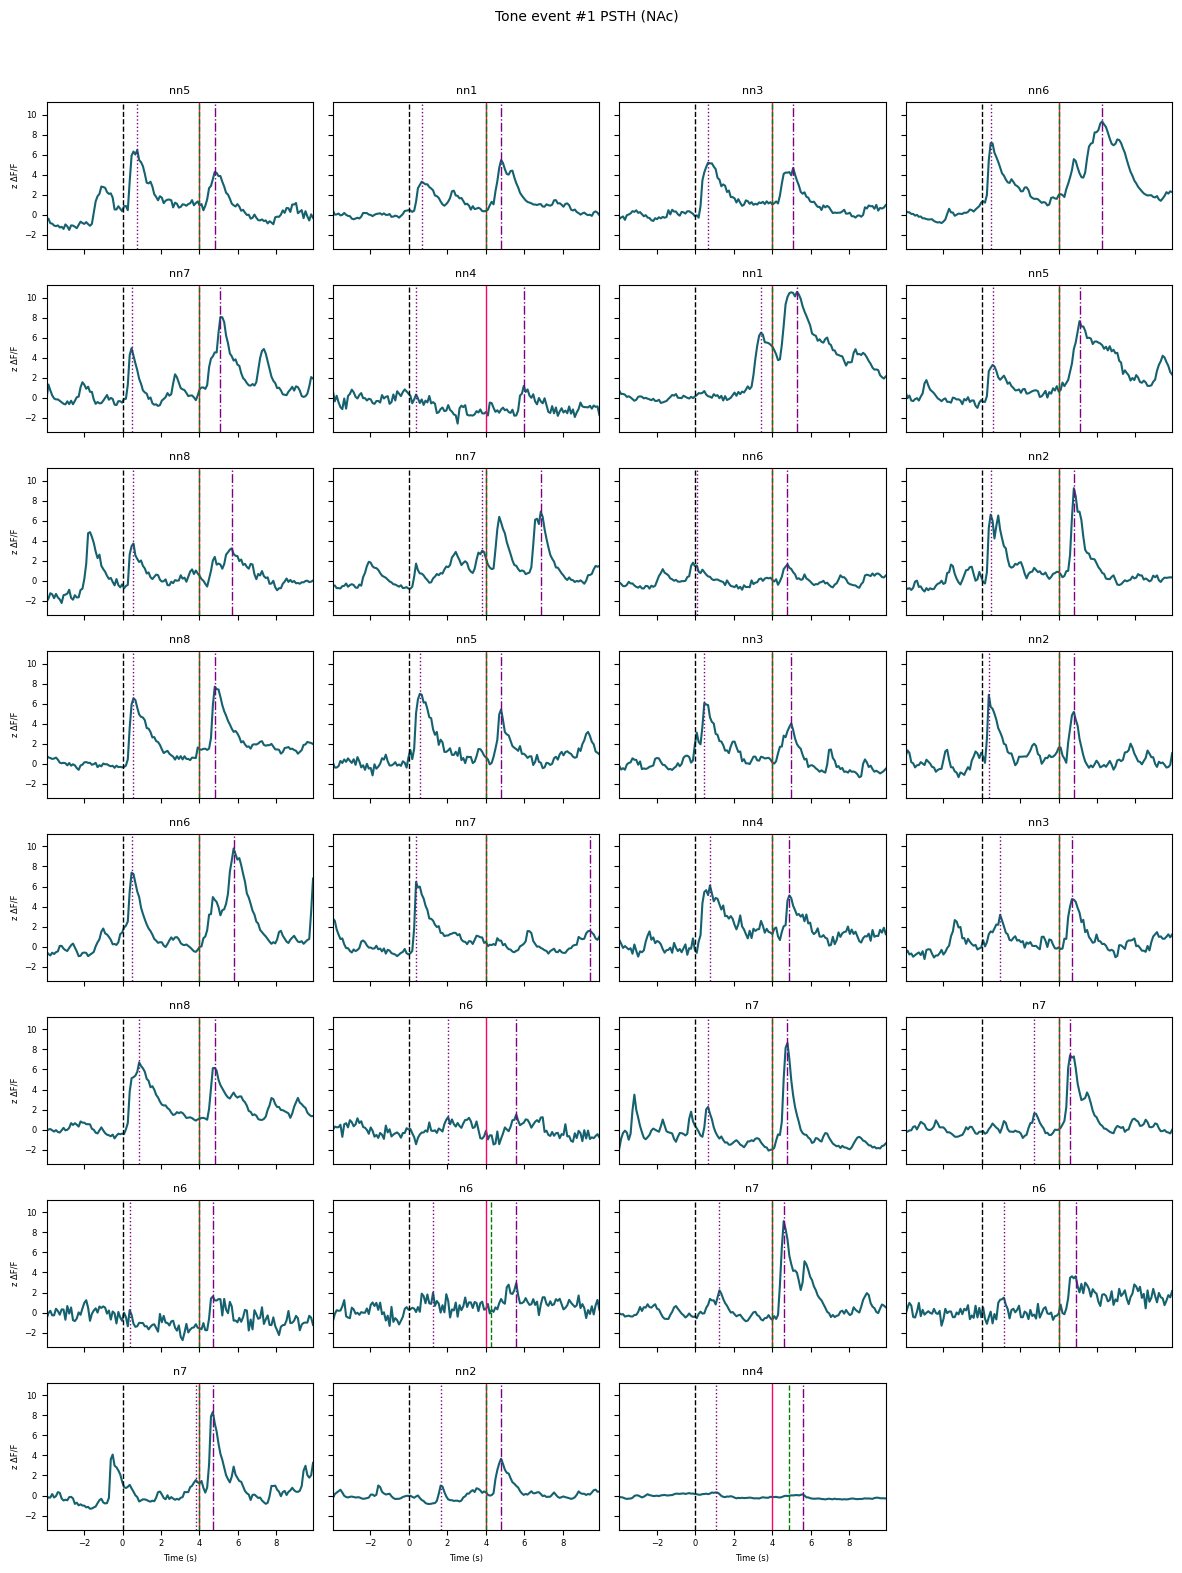

In [20]:
peak_nac_df = exp.plot_tone_and_lick_peaks_with_first_lick(df_winning, event_index=1, brain_region='NAc')


In [34]:
peak_nac_df
# Save without the index column:

,video_name,subject_name,event_index,brain_region,tone_abs_time_s,tone_peak_time_s,tone_peak_amp,lick_peak_time_s,lick_peak_amp,first_lick_time_s
0,nn5-250203-080636,nn5,1,NAc,1121.133527,0.767252,6.478299,4.797716,4.288734,4.000000
1,nn1-250203-085508,nn1,1,NAc,330.008658,0.668948,3.308366,4.797716,5.462826,4.000000
2,nn3-250203-085508,nn3,1,NAc,250.008207,0.668948,5.212932,5.092628,4.675902,4.000000
3,nn6-250203-112333,nn6,1,NAc,320.798228,0.472340,7.160802,6.272276,9.324818,4.000000
4,nn7-250203-112333,nn7,1,NAc,1595.806679,0.472340,4.965004,5.092628,8.067726,4.000000
5,nn4-250203-121223,nn4,1,NAc,243.716096,0.374036,0.332746,5.977364,1.190421,25.120113
6,nn1-250205-090150,nn1,1,NAc,1596.170404,3.421460,6.495879,5.289236,10.563955,4.000000
7,nn5-250205-104235,nn5,1,NAc,367.355331,0.570644,3.271271,5.092628,7.647119,4.000000
8,nn8-250205-104235,nn8,1,NAc,287.355044,0.570644,3.720860,5.682452,3.236955,4.000000
9,nn7-250205-131504,nn7,1,NAc,241.069916,3.814676,3.003676,6.862100,6.904975,4.000000


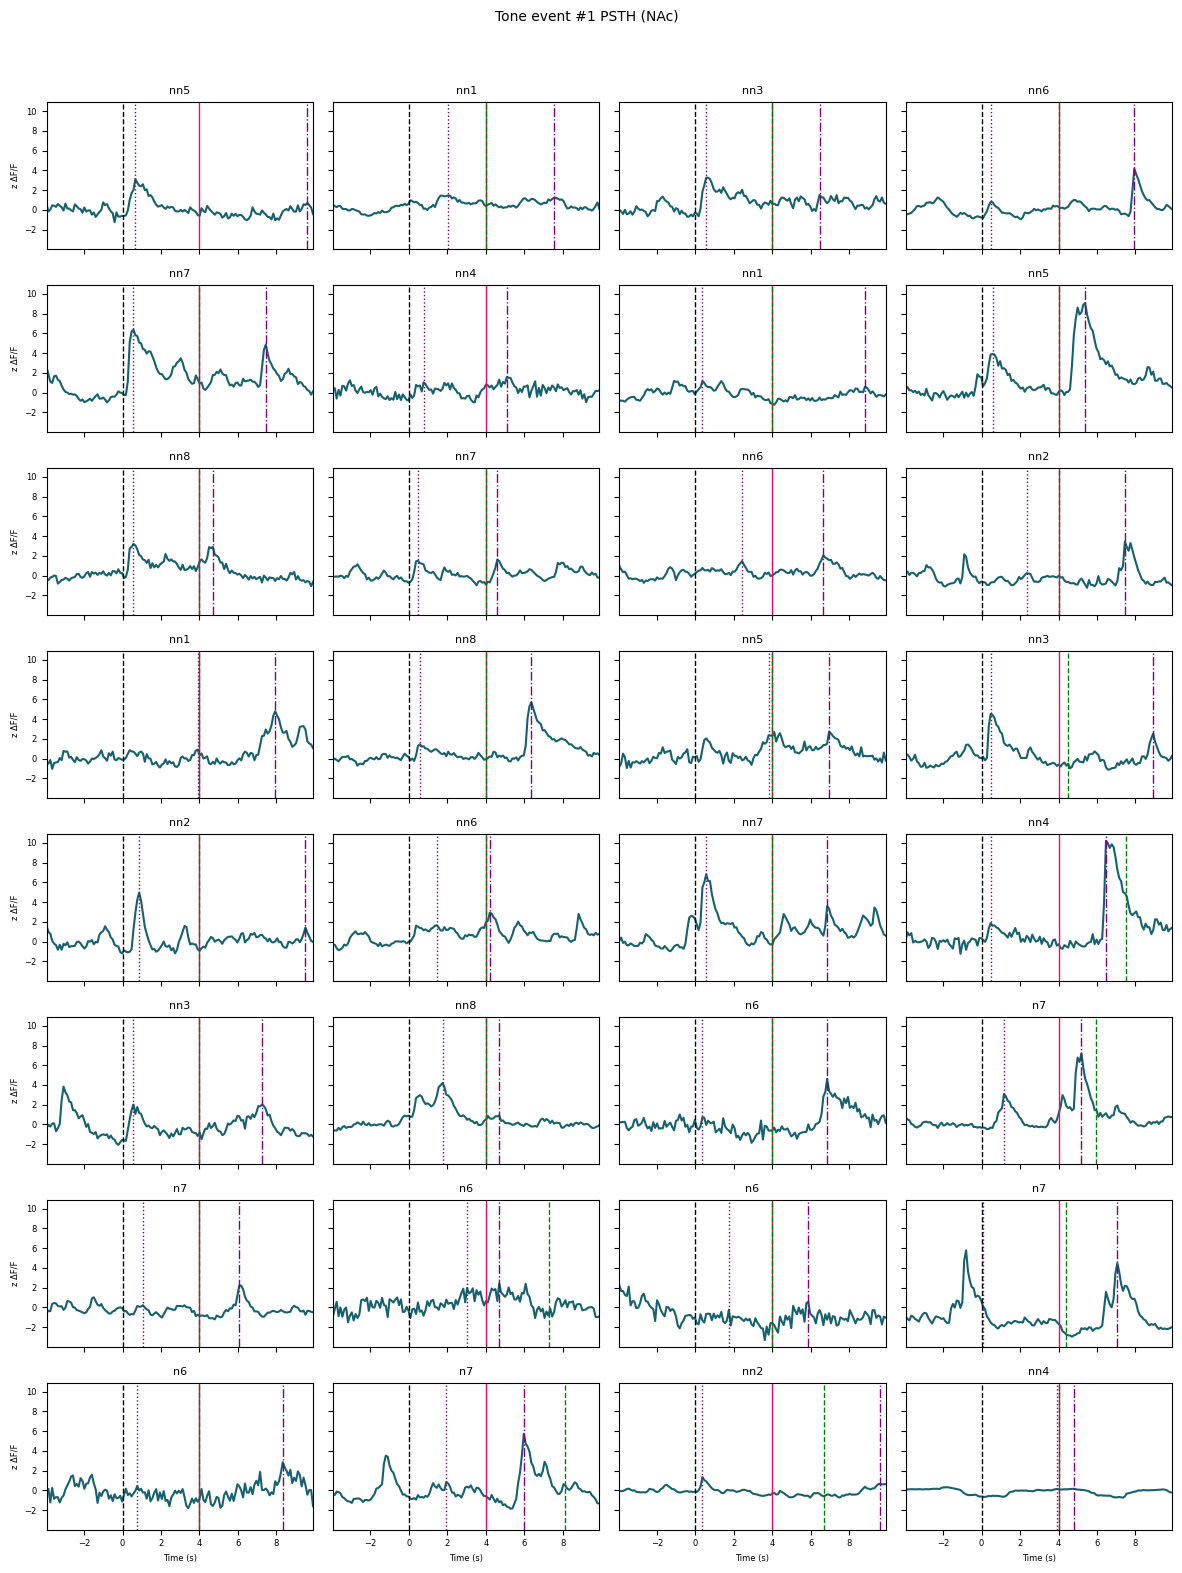

In [22]:
peak_losing_nac_df = exp.plot_tone_and_lick_peaks_with_first_lick(df_losing, event_index=1, brain_region='NAc')

In [23]:
# peak_df = exp.plot_event_index_grid(df_winning, 'Tone', 1, 'mPFC')

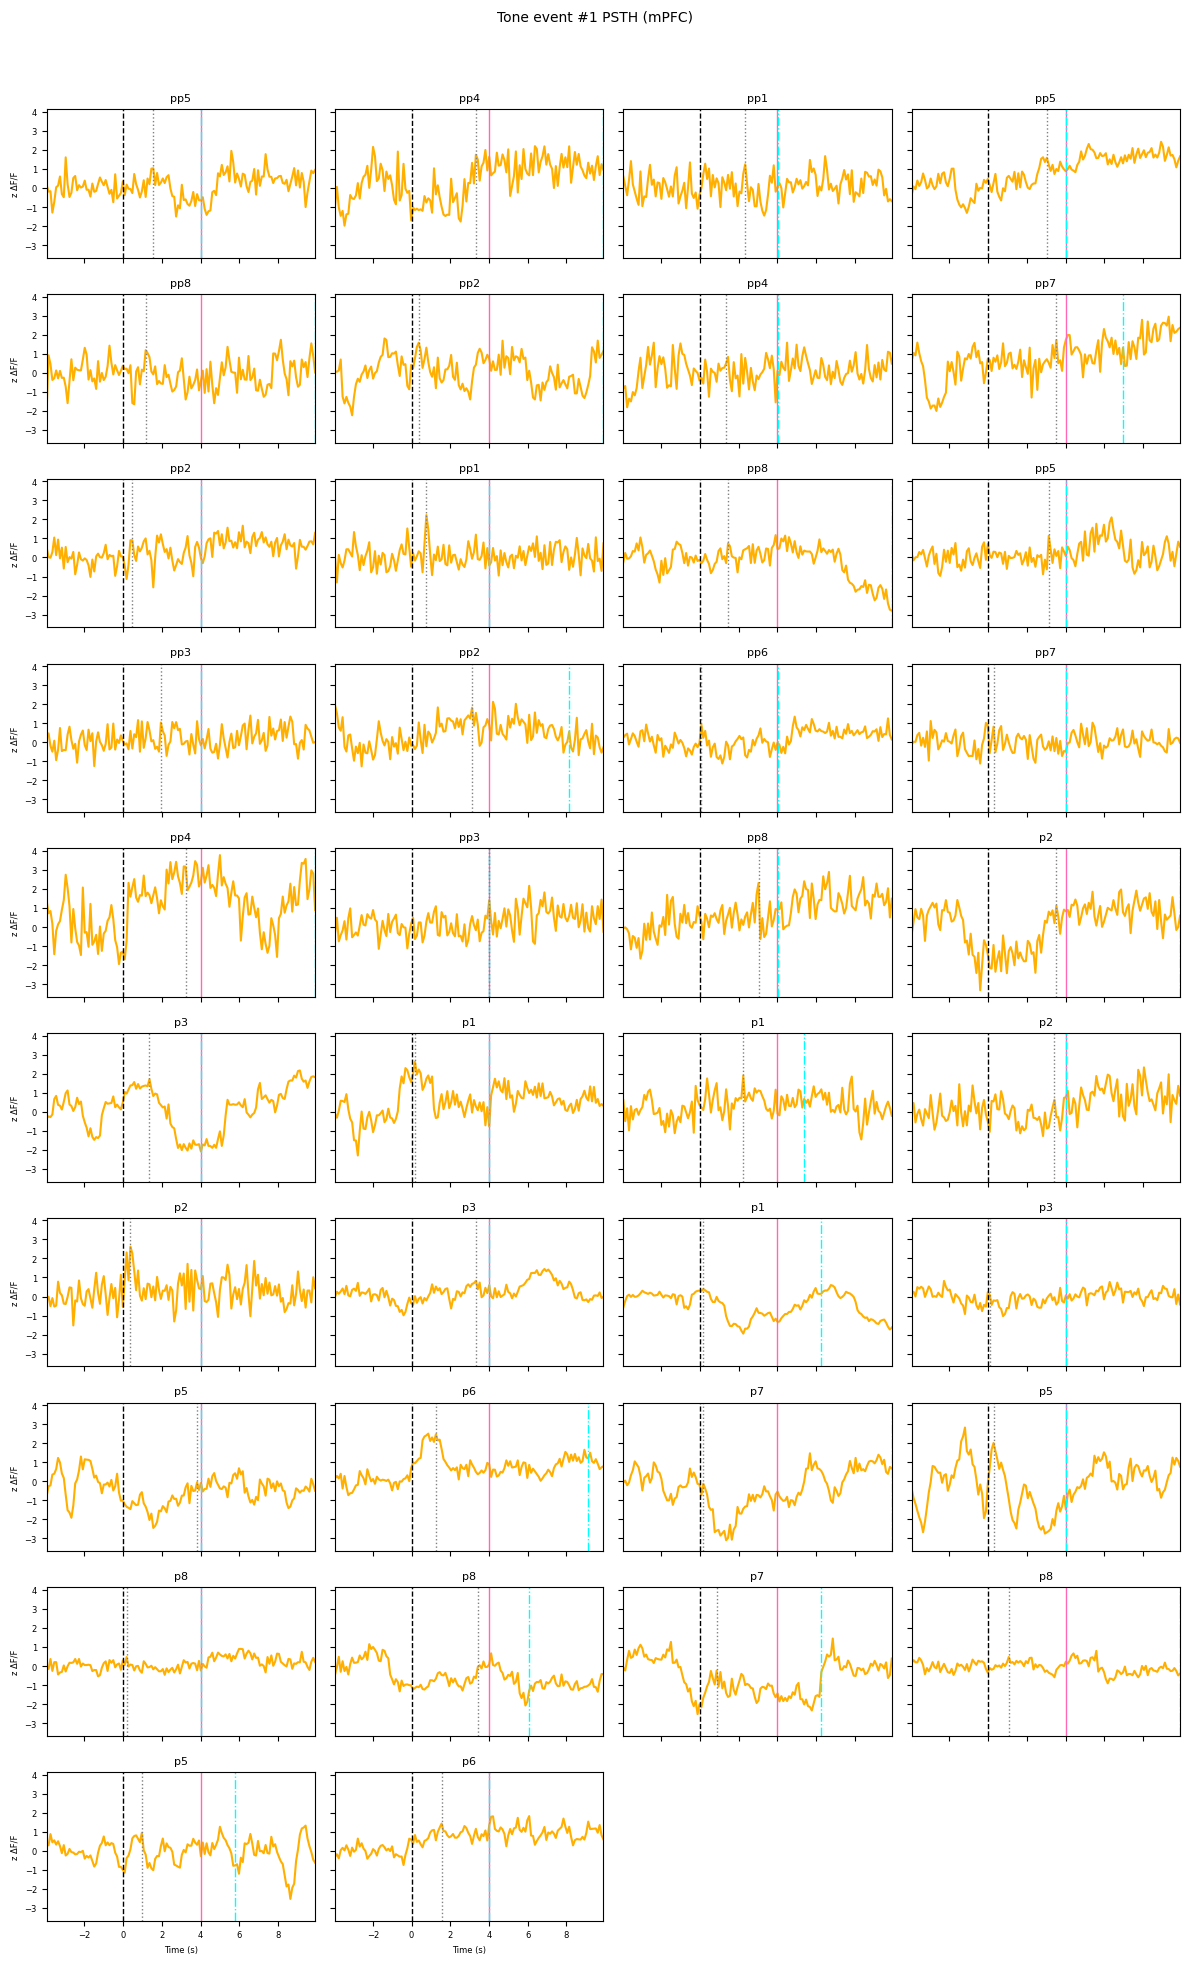

In [24]:
peak_df = exp.plot_event_index_grid(df_winning, 'Tone', 1, 'mPFC')

# Looking at Peak Variance

In [25]:
# Plots PSTHs for all bouts within a session based on winning or losing
"""exp.apply_rc_plot_peth(df_winning, directory_path=directory_path10)
exp.apply_rc_plot_peth(df_losing, directory_path=directory_path11)"""

'exp.apply_rc_plot_peth(df_winning, directory_path=directory_path10)\nexp.apply_rc_plot_peth(df_losing, directory_path=directory_path11)'

In [26]:
# Plots the PETH of the first and last bouts of either win or loss.
"""exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)"""

"exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='

## Mean PSTH graphs

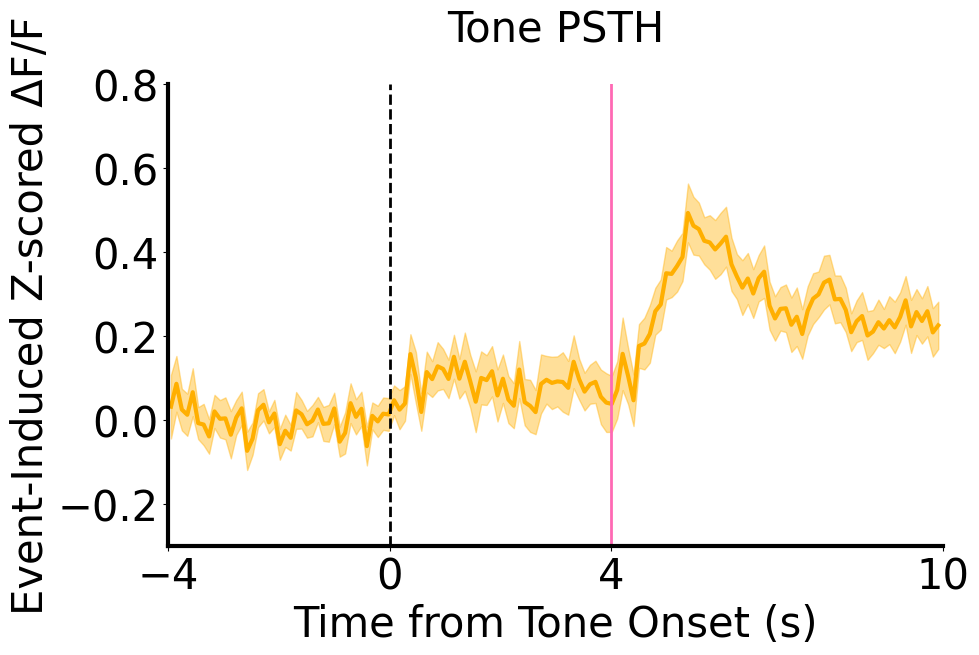

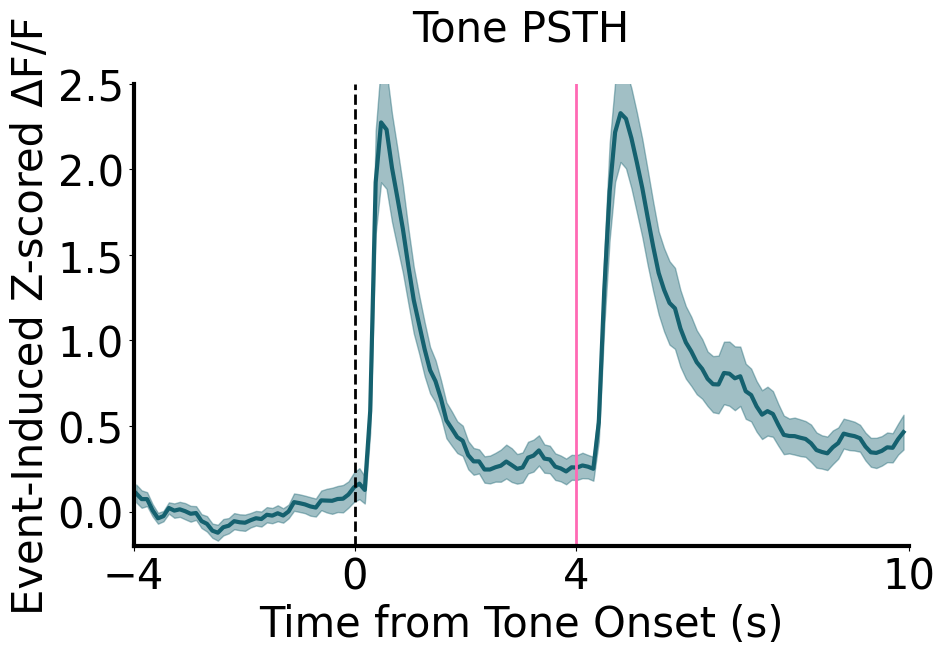

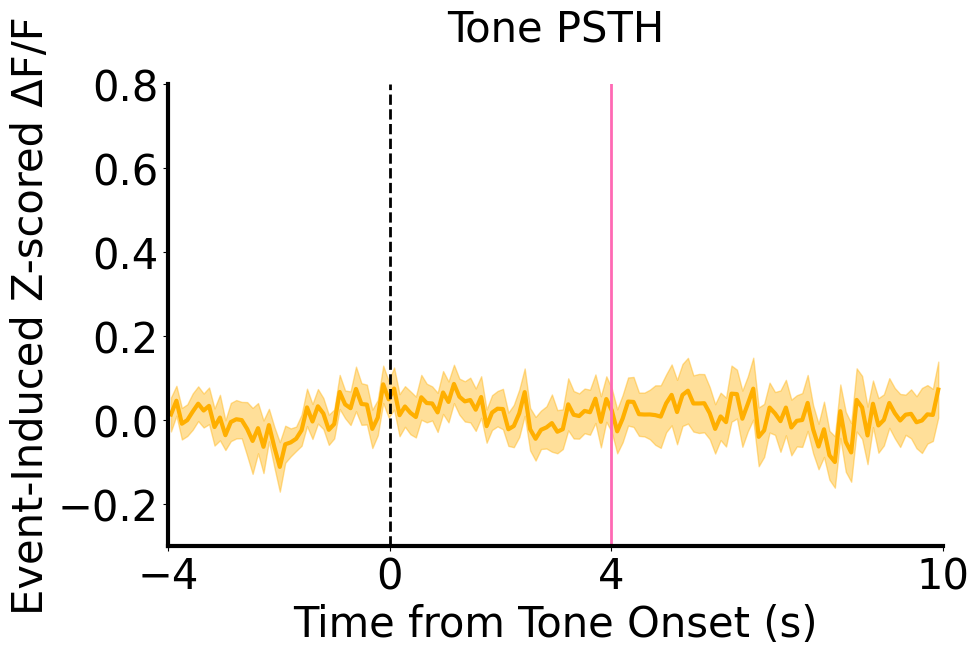

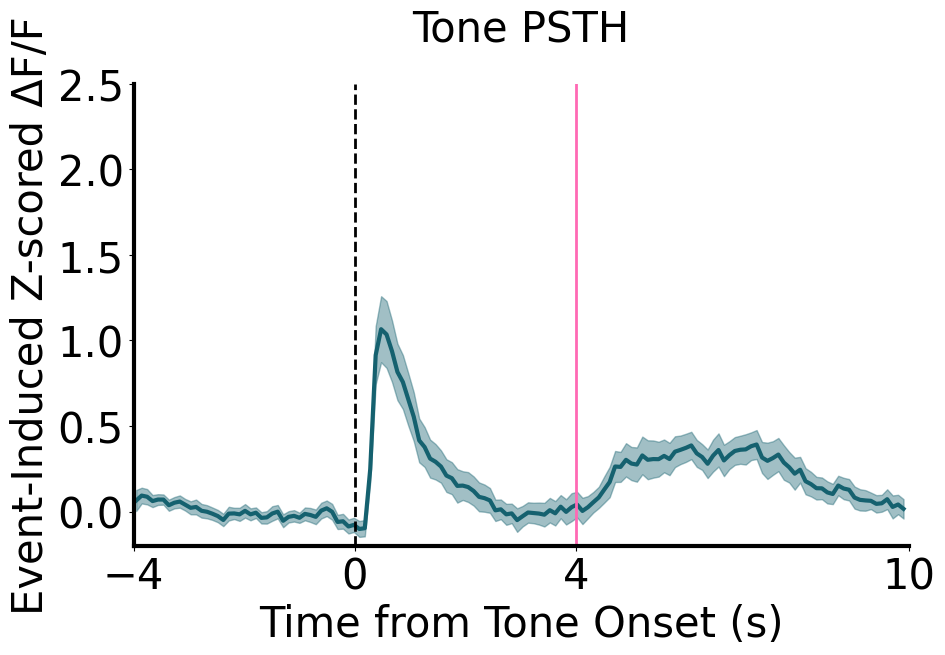

In [27]:
# Plots the mean psth for winning or losing bouts for tones
exp.plot_mean_psth(df_winning, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=0.8)
exp.plot_mean_psth(df_winning, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)
exp.plot_mean_psth(df_losing, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=0.8)
exp.plot_mean_psth(df_losing, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)

## PSTH of Losing Trials

In [28]:
# Plots the PSTH of either the first or last bout of loss

# Plots the PSTH of the first losing bout
"""exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True, plot_win=False)
exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True, plot_win=False)"""

# Plots the PSTH of the last losing bout
"""exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False, plot_win=False)
exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False, plot_win=False)"""

"exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False, plot_win=False)\nexp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False, plot_win=False)"

## PSTH of winning trials

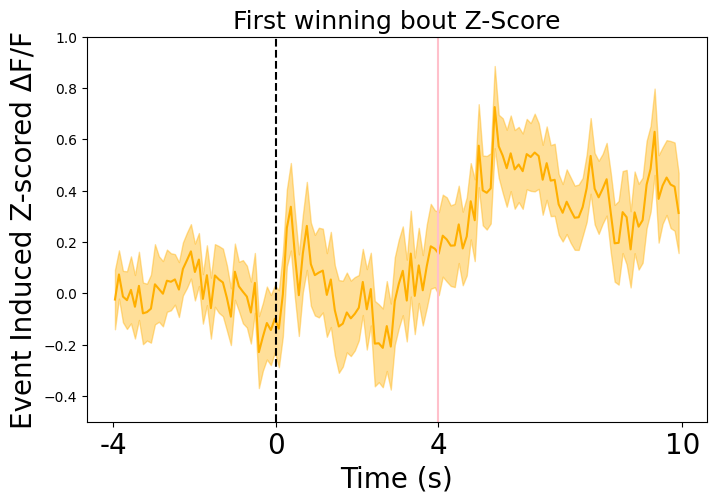

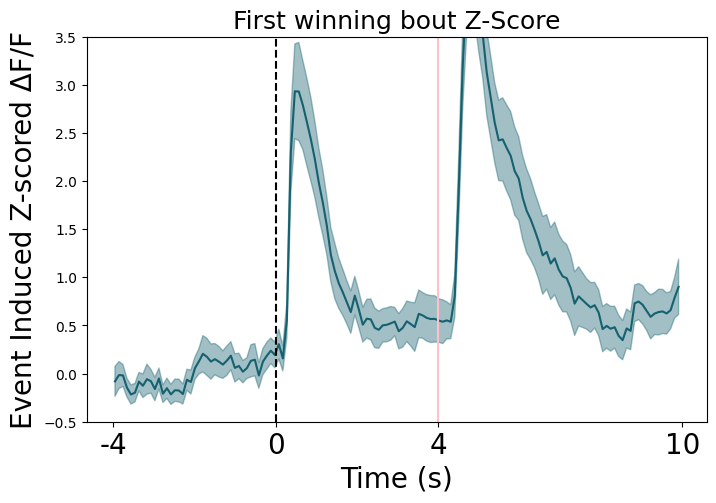

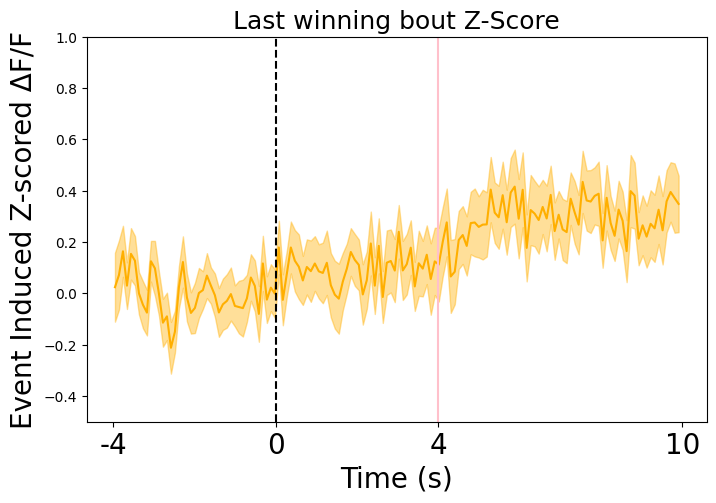

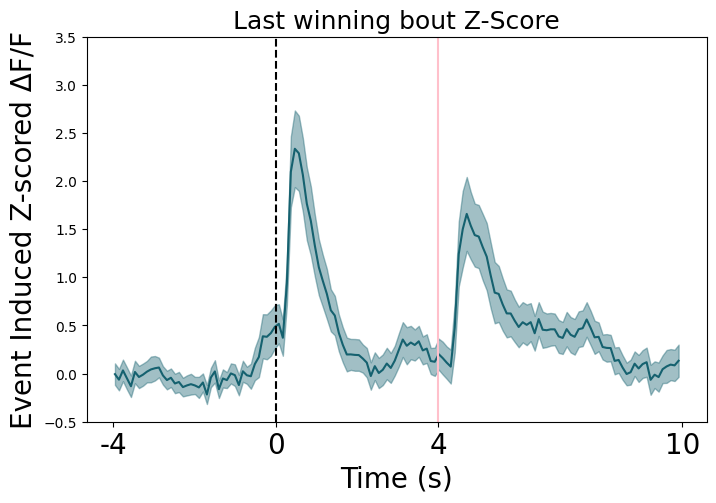

In [29]:
# Plots the PSTH of either the first or last bout of win

# Plots the PSTH of the first winning bout
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True)
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True)
# Plots the PSTH of the last winning bout
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False)
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False)

## Heat Maps Tones

In [30]:
# Plots tone response for first and last wins and loses as heatmaps instead of PSTHs
"""exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'mPFC')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'mPFC')
exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'NAc')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'NAc')"""

"exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'mPFC')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'mPFC')\nexp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'NAc')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'NAc')"

## Heat Maps Licks

In [31]:
# Plots lick response for first and last wins and loses as heatmaps instead of PSTHs
"""exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'mPFC')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'mPFC')
exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'NAc')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'NAc')"""

"exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'mPFC')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'mPFC')\nexp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'NAc')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'NAc')"

## First Tone PSTHs

In [32]:
# Winning First tone response
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=save_path, brain_region='NAc', y_min=-1, y_max=5, df=df_winning, bin_size=100)

# Losing First Tone Response
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=save_path, brain_region='NAc', y_min=-1, y_max=5, df=df_losing, bin_size=100)

NameError: name 'save_path' is not defined

## Finding Means

In [ ]:
print(df_winning.columns)
exp.drop_unnecessary(df_winning)
exp.drop_unnecessary(df_losing)
df_win1 = exp.find_overall_mean(df_winning)
df_lose1 = exp.find_overall_mean(df_losing)

In [ ]:
print(df_win1)

## Heat maps of winning and losing for all subjects

In [ ]:
# Each row represents a separate subject

exp.plot_mean_per_row_heatmaps(df_win1, 'win', 'Tone', directory_path8, 'mPFC')
exp.plot_mean_per_row_heatmaps(df_lose1, 'lose', 'Tone', directory_path8, 'mPFC')
exp.plot_mean_per_row_heatmaps(df_win1, 'win', 'Tone', directory_path8, 'NAc')
exp.plot_mean_per_row_heatmaps(df_lose1, 'lose', 'Tone', directory_path8, 'NAc')

In [ ]:
exp = Reward_Competition(experiment_folder_path=experiment_path, behavior_folder_path=None)

In [ ]:
# Plots win and lose da_metrics in bar plots side by side. Method can be changed for global
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='AUC', directory_path=directory_path2)
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='Max Peak', directory_path=directory_path2)
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='Mean Z-score', directory_path=directory_path2)

## Plots first and last win/lass bouts for Global DA

In [ ]:
# Plots bar plots of the first and last wins or loses side by side.
exp.plot_da_first_last(df_win1, metric_name='AUC', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win1, metric_name='AUC', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")

In [ ]:
# Same as previous but using Max Peak as metric
"""exp.plot_da_first_last(df_win, metric_name='Max Peak', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Max Peak', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")"""

In [ ]:
# Same as previous but using Mean Z-score as metric
"""exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")"""

## Plot first and last win/loss bouts for Event Induced DA

In [ ]:
# Same as previous but using EI da metrics.
"""exp.plot_da_first_last(df_win, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

In [ ]:
"""exp.plot_da_first_last(df_win, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

In [ ]:
"""exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

## Scatter plots for Event Induced

In [ ]:
# Plots a scatter plot based on DA metric to tone and rank within cage. metric_name can be changed for other metrics
exp.scatter_dominance(directory_path1, df_win1, metric_name='Tone AUC', method='EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_lose1, metric_name='Tone AUC', method='EI', condition="Losing")

## First Tone DA

In [ ]:
# Plots the DA metrics from the first tone as bar plots side by side
"""exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='AUC Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='Max Peak Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='Mean Z-score Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='AUC Mean', directory_path=directory_path9)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='Max Peak Mean', directory_path=directory_path9)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='Mean Z-score Mean', directory_path=directory_path9)"""

In [ ]:
# Plots scatter plots for dominance using only the DA-response from the first tone.
"""exp.scatter_dominance(directory_path1, df_first_win1, metric_name='AUC', method=' EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_first_lose1, metric_name='AUC', method=' EI', condition="Losing")
exp.scatter_dominance(directory_path1, df_first_win1, metric_name='Max Peak', method=' EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_first_lose1, metric_name='Max Peak', method=' EI', condition="Losing")
exp.scatter_dominance(directory_path1, df_first_win1, 'Mean Z-score', method=' EI', condition='Winning')
exp.scatter_dominance(directory_path1, df_first_lose1, 'Mean Z-score', method=' EI', condition='Losing')"""